# AutoInland Vehicle Insurance Claim Challenge StarterNotebook - R

This is a simple starter notebook to get started with the AutoInland Vehicle Insurance Claim Challenge on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [1]:
#Check version of R
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

### Install packages

In [2]:
install.packages("fastDummies")
install.packages('naniar')
install.packages("caret")
install.packages("e1071")
install.packages('devtools')
library(devtools)
devtools::install_github('catboost/catboost', subdir = 'catboost/R-package')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘data.table’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis





✔  checking for file ‘/tmp/RtmpoH31kX/remotes3a107fdfae/catboost-catboost-8589fd4/catboost/R-package/DESCRIPTION’
─  preparing ‘catboost’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘catboost_0.24.4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Importing libraries

In [3]:
# Import libraries
library(tidyverse)
library(fastDummies)
library(naniar)
library(catboost)
library(caret)
library(e1071)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




### Read files

In [4]:
# Load files
train = read.csv('/content/Train.csv', na.strings=c("","NA"))
test = read.csv('/content/Test.csv', na.strings=c("","NA"))
sample = read.csv('/content/SampleSubmission.csv')

### Some basic EDA

In [5]:
# Preview first five rows of the train set
head(train)

,ID,Policy.Start.Date,Policy.End.Date,Gender,Age,First.Transaction.Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NA,NA,Car Classic,0
2,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NA,NA,Car Classic,1
3,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NA,NA,Car Classic,0
4,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NA,NA,NA,NA,NA,CarSafe,0
5,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NA,NA,NA,Lagos,Lagos,Muuve,1
6,00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,NA,NA,NA,NA,NA,Car Classic,0


In [6]:
# Preview first five rows of the test set
head(test)

,ID,Policy.Start.Date,Policy.End.Date,Gender,Age,First.Transaction.Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NA,As Attached,Iveco,Victoria Island,Lagos,CVTP
2,01DO2EQ,2010-01-01,2010-12-31,NA,120,2010-01-01,4,NA,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
3,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NA,NA,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
4,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NA,NA,NA,Kosofe,Benue,Car Classic
5,02BYET3,2010-09-16,2010-12-31,NA,120,2010-09-16,4,NA,NA,TOYOTA,Victoria Island,Lagos,Muuve
6,02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic


In [7]:
# Preview first five rows of the sample submission file
head(sample)

,ID,target
,<chr>,<int>
1,009D84L,0
2,01DO2EQ,0
3,01QM0NU,0
4,024NJLZ,0
5,02BYET3,0
6,02NOVWQ,0


In [8]:
# Check the shape of the train set, test and sample submission file
dim(train)
dim(test)
dim(sample)

[1] 12079    14

[1] 5177   13

[1] 5177    2

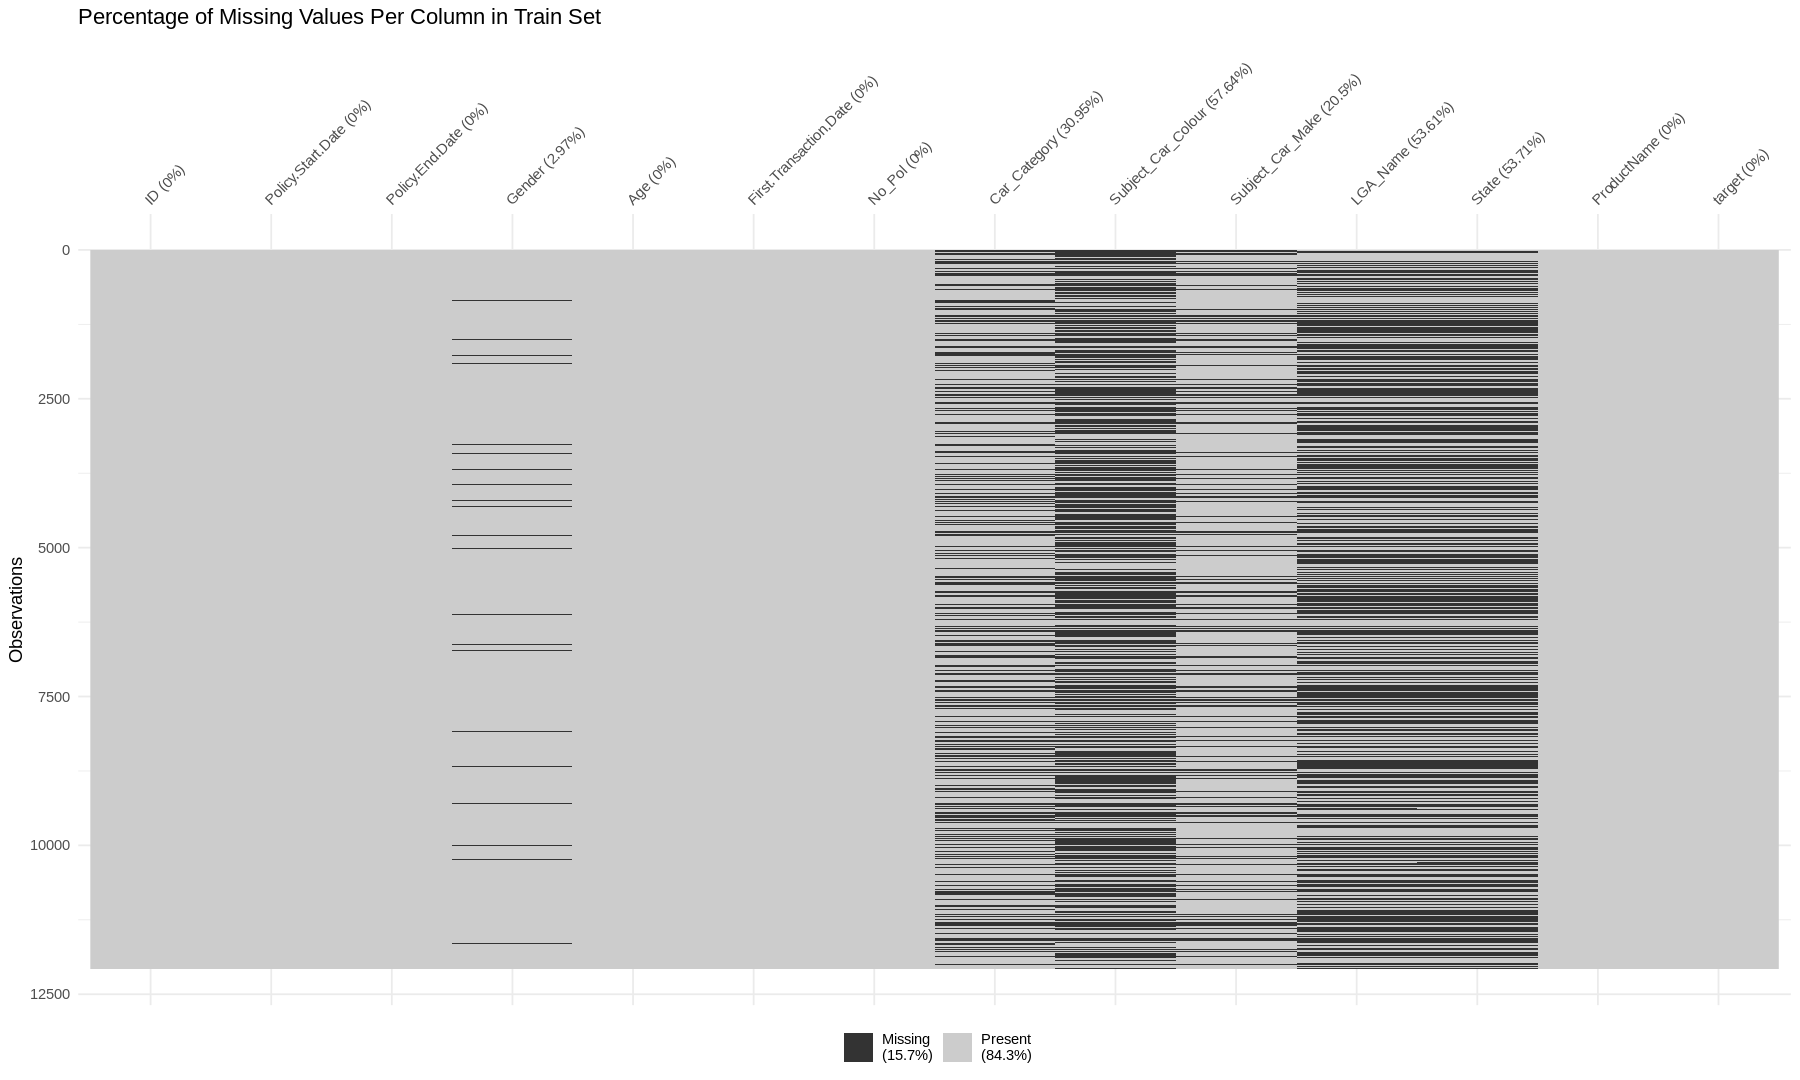

In [9]:
# Check if there any missing values in train set
options(repr.plot.width = 15, repr.plot.height = 9)
visdat::vis_miss(train) + 
  labs(title = 'Percentage of Missing Values Per Column in Train Set')

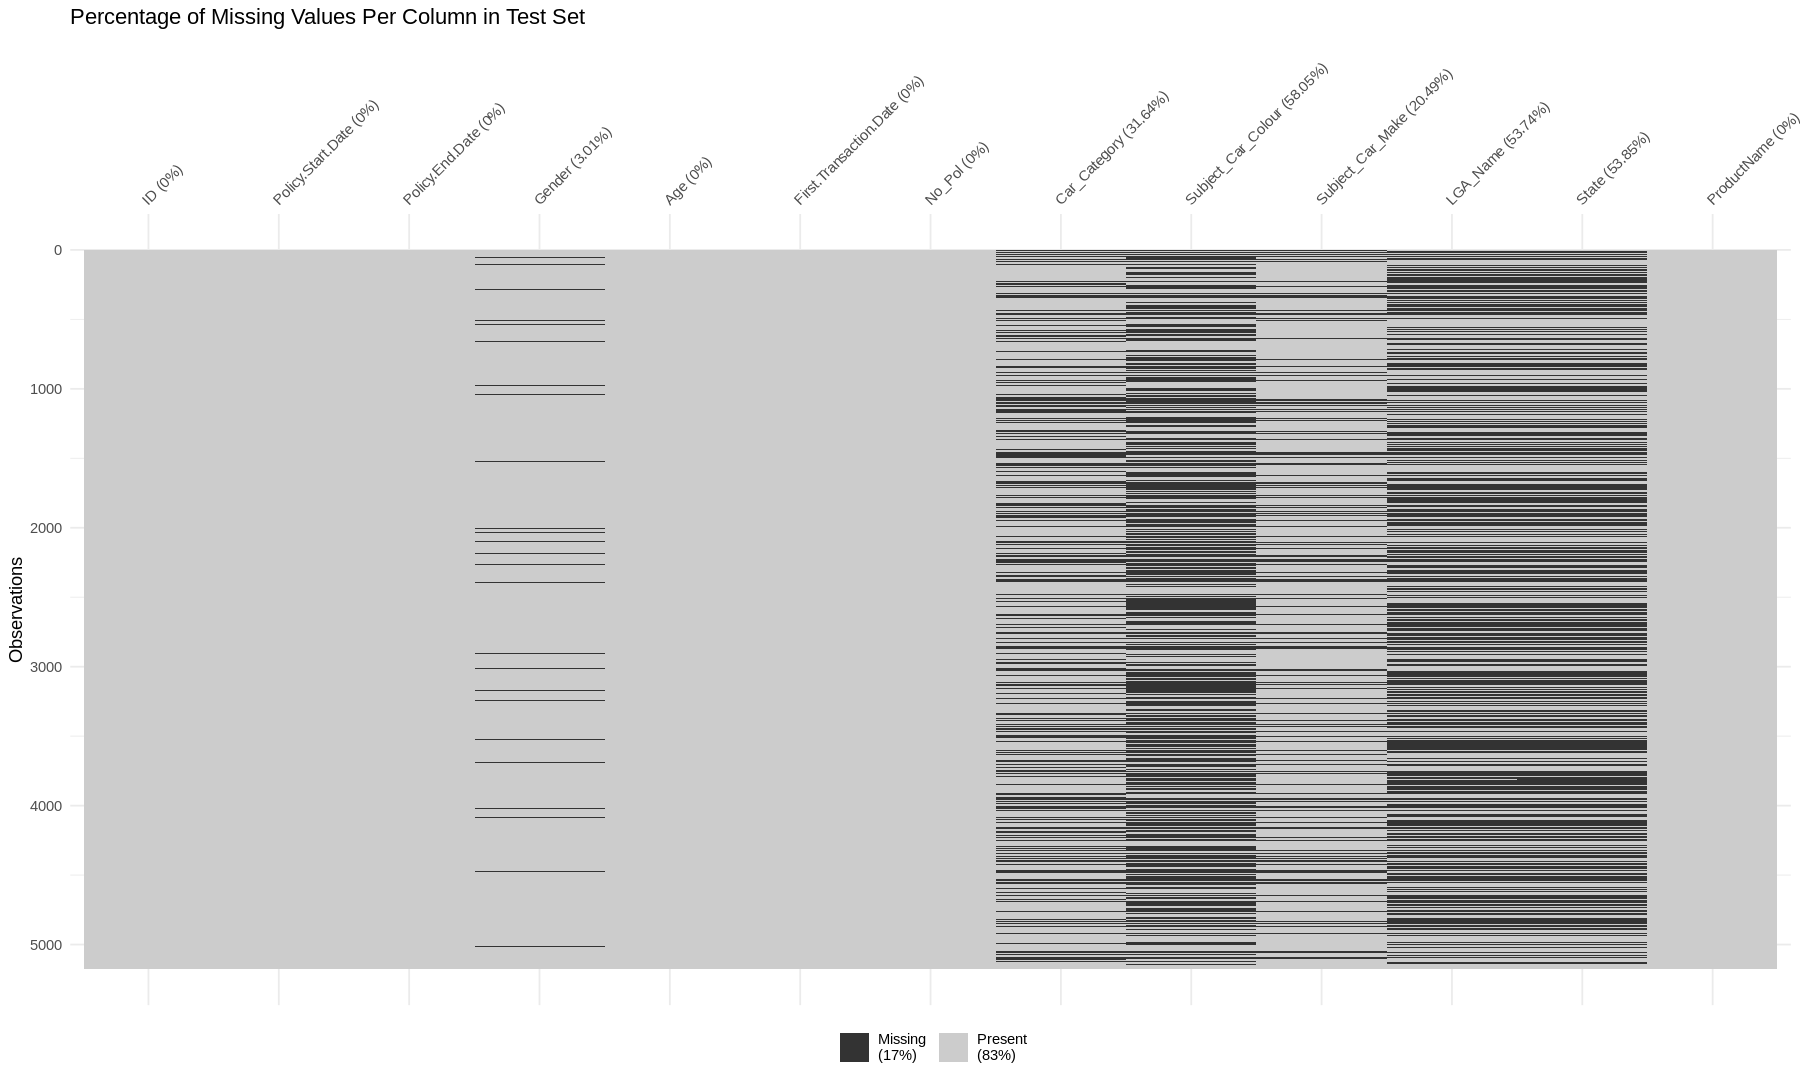

In [10]:
# Check if there any missing values in test set
options(repr.plot.width = 15, repr.plot.height = 9)
visdat::vis_miss(test) + 
  labs(title = 'Percentage of Missing Values Per Column in Test Set')

## Combine train and test set for easy preprocessing 

In [11]:
# Add target column to test for rbinding
test$target = NA

# To be used in splitting
ntrain = dim(train)[1]

all_data = rbind(train, test)
head(all_data)

,ID,Policy.Start.Date,Policy.End.Date,Gender,Age,First.Transaction.Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NA,NA,Car Classic,0
2,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NA,NA,Car Classic,1
3,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NA,NA,Car Classic,0
4,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NA,NA,NA,NA,NA,CarSafe,0
5,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NA,NA,NA,Lagos,Lagos,Muuve,1
6,00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,NA,NA,NA,NA,NA,Car Classic,0


In [12]:
# Total missing values
train %>%
  gather(key = "key", value = "val") %>%
  mutate(is.missing = is.na(val)) %>%
  group_by(key, is.missing) %>%
  summarise(num.missing = n()) %>%
  filter(is.missing==T) %>%
  select(-is.missing) %>%
  arrange(desc(num.missing))

`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



key,num.missing
<chr>,<int>
Subject_Car_Colour,6962
State,6488
LGA_Name,6476
Car_Category,3738
Subject_Car_Make,2476
Gender,359


In [13]:
# Check the datatypes of each column
glimpse(all_data)

Rows: 17,256
Columns: 14
$ ID                     <chr> "0040R73", "0046BNK", "005QMC3", "0079OHW", "00…
$ Policy.Start.Date      <chr> "2010-05-14", "2010-11-29", "2010-03-21", "2010…
$ Policy.End.Date        <chr> "2011-05-13", "2011-11-28", "2011-03-20", "2011…
$ Gender                 <chr> "Male", "Female", "Male", "Male", "Entity", "Ma…
$ Age                    <int> 30, 79, 43, 2, 20, 37, 40, 43, 71, 58, 43, 45, …
$ First.Transaction.Date <chr> "2010-05-14", "2010-11-29", "2010-03-21", "2010…
$ No_Pol                 <int> 1, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1,…
$ Car_Category           <chr> "Saloon", "JEEP", "Saloon", NA, NA, NA, NA, "Sa…
$ Subject_Car_Colour     <chr> "Black", "Grey", "Red", NA, NA, NA, NA, NA, "Bl…
$ Subject_Car_Make       <chr> "TOYOTA", "TOYOTA", "TOYOTA", NA, NA, NA, NA, "…
$ LGA_Name               <chr> NA, NA, NA, NA, "Lagos", NA, "Ikeja", NA, "Bada…
$ State                  <chr> NA, NA, NA, NA, "Lagos", NA, "Lagos", NA, "Benu…
$ ProductName  

In [14]:
# Change each column to its appriopriate datatype
date_cols = c("Policy.Start.Date", "Policy.End.Date", "First.Transaction.Date")
num_cols = c('Age', 'No_Pol')
cat_cols = c('Gender','Car_Category','Subject_Car_Colour','Subject_Car_Make','LGA_Name','State','ProductName')

all_data[date_cols] = lapply(all_data[date_cols], as.Date)
all_data[cat_cols] = lapply(all_data[cat_cols], as.factor)

# Confirm whether the changes have been applied successfully
glimpse(all_data)

Rows: 17,256
Columns: 14
$ ID                     <chr> "0040R73", "0046BNK", "005QMC3", "0079OHW", "00…
$ Policy.Start.Date      <date> 2010-05-14, 2010-11-29, 2010-03-21, 2010-08-21…
$ Policy.End.Date        <date> 2011-05-13, 2011-11-28, 2011-03-20, 2011-08-20…
$ Gender                 <fct> Male, Female, Male, Male, Entity, Male, Female,…
$ Age                    <int> 30, 79, 43, 2, 20, 37, 40, 43, 71, 58, 43, 45, …
$ First.Transaction.Date <date> 2010-05-14, 2010-11-29, 2010-03-21, 2010-08-21…
$ No_Pol                 <int> 1, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1,…
$ Car_Category           <fct> Saloon, JEEP, Saloon, NA, NA, NA, NA, Saloon, J…
$ Subject_Car_Colour     <fct> Black, Grey, Red, NA, NA, NA, NA, NA, Black, NA…
$ Subject_Car_Make       <fct> TOYOTA, TOYOTA, TOYOTA, NA, NA, NA, NA, TOYOTA,…
$ LGA_Name               <fct> NA, NA, NA, NA, Lagos, NA, Ikeja, NA, Badagry, …
$ State                  <fct> NA, NA, NA, NA, Lagos, NA, Lagos, NA, Benue, Et…
$ ProductName  

### Distribution of the target variable

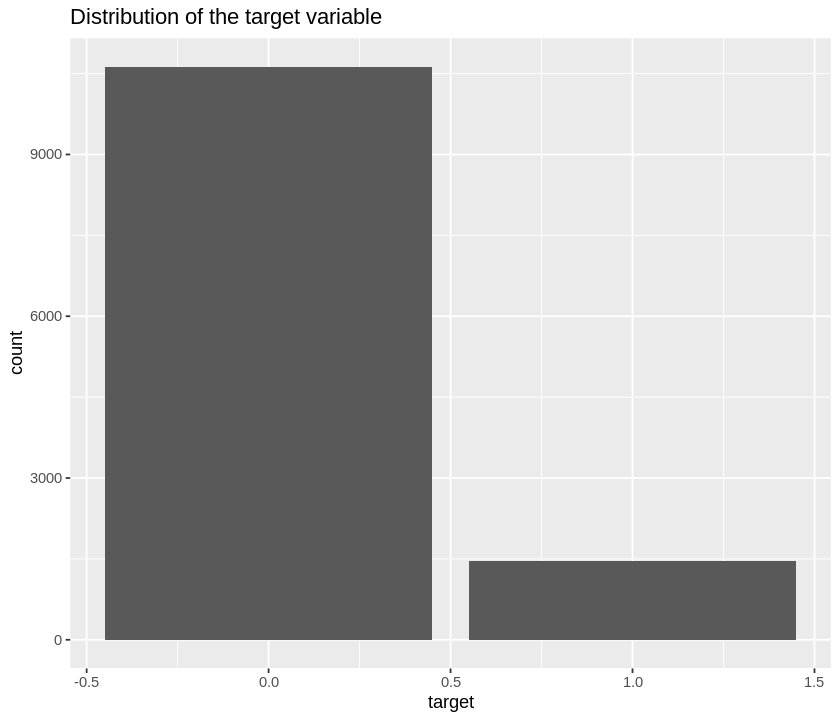

In [15]:
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(train, aes(x=target)) +
  geom_bar() +
  labs(title = "Distribution of the target variable")

### Distribution of the Gender column

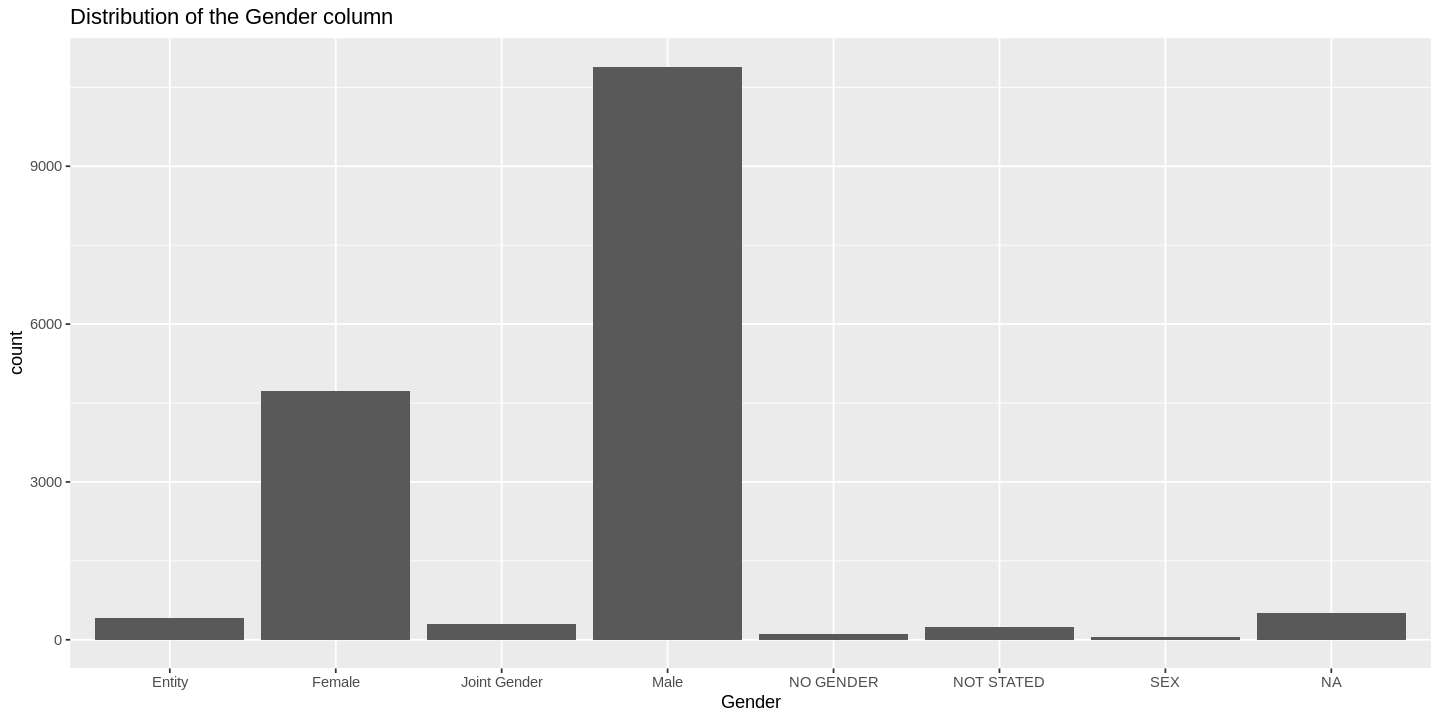

In [16]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(all_data, aes(x = Gender)) + 
  geom_bar() + 
  labs(title="Distribution of the Gender column")

In [17]:
all_data$Gender = recode(all_data$Gender, 'Entity'='Other', 'Joint Gender'='Other', 'NOT STATED'='Other', 'NO GENDER'='Other', 'SEX'="Other")

# Confirm mappings
print(unique(all_data$Gender))

[1] Male   Female Other  <NA>  
Levels: Other Female Male


### Number of unique values per categorical column

In [18]:
# Check unique values for each categorical column
for (col in cat_cols){
  print(paste0(col, ':  ', length(unique(all_data[[col]]))))
}

[1] "Gender:  4"
[1] "Car_Category:  17"
[1] "Subject_Car_Colour:  47"
[1] "Subject_Car_Make:  76"
[1] "LGA_Name:  271"
[1] "State:  114"
[1] "ProductName:  9"


### Filling in missing values
#### Missing values can be filled using different strategies
Tips:
 - Mean
 - Max
 - Min
 - Mode
 -Drop observations with missing values
 - [Mice - Multivariate Imputation by Chained Equations](https://cran.r-project.org/web/packages/mice/index.html)
 - Others... do more reasearch

In [19]:
# Fill in missing values 
# Function to get mode
getmode = function(x) {
  ux = na.omit(unique(x) )
 tab = tabulate(match(x, ux)); ux[tab == max(tab) ]
}

# Fill cat cols with mode
all_data$Gender[which(is.na(all_data$Gender))] = getmode(all_data$Gender)
all_data$Car_Category[which(is.na(all_data$Car_Category))] = getmode(all_data$Car_Category)
all_data$Subject_Car_Colour[which(is.na(all_data$Subject_Car_Colour))] = getmode(all_data$Subject_Car_Colour)
all_data$Subject_Car_Make[which(is.na(all_data$Subject_Car_Make))] = getmode(all_data$Subject_Car_Make)
all_data$LGA_Name[which(is.na(all_data$LGA_Name))] = getmode(all_data$LGA_Name)
all_data$State[which(is.na(all_data$State))] = getmode(all_data$State)
all_data$ProductName[which(is.na(all_data$ProductName))] = getmode(all_data$ProductName)

# Confirm that there aren't any missing values
all_data[, -which(names(all_data) %in% c("target"))] %>%
  gather(key = "key", value = "val") %>%
  mutate(is.missing = is.na(val)) %>%
  group_by(key, is.missing) %>%
  summarise(num.missing = n()) %>%
  filter(is.missing==T) %>%
  select(-is.missing) %>%
  arrange(desc(num.missing))

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



key,num.missing
<chr>,<int>


### Feature Engineering
#### Alot of features can be extracted from dates
Tips:
 - Quarter, Start of Year, month?
 - Is it a weekend, weekday?
 - Is it a holiday
 - Duration between different periods, e.g start and end of a policy
 - What features can be derived from the age column
 - Be creative 😉

In [20]:
# Extract date features from the date columns
for (col in date_cols){
  all_data[paste(col, 'Year', sep=" ")] = format(all_data[col], "%Y")
  all_data[paste(col, 'Month', sep=" ")] = format(all_data[col], "%m")
  all_data[paste(col, 'Day', sep=" ")] = format(all_data[col], "%d")
}

head(all_data)

,ID,Policy.Start.Date,Policy.End.Date,Gender,Age,First.Transaction.Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,⋯,target,Policy.Start.Date Year,Policy.Start.Date Month,Policy.Start.Date Day,Policy.End.Date Year,Policy.End.Date Month,Policy.End.Date Day,First.Transaction.Date Year,First.Transaction.Date Month,First.Transaction.Date Day
,<chr>,<date>,<date>,<fct>,<int>,<date>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,⋯,0,2010,05,14,2011,05,13,2010,05,14
2,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,⋯,1,2010,11,29,2011,11,28,2010,11,29
3,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,⋯,0,2010,03,21,2011,03,20,2010,03,21
4,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,⋯,0,2010,08,21,2011,08,20,2010,08,21
5,00BRP63,2010-08-29,2010-12-31,Other,20,2010-08-29,3,Saloon,Black,TOYOTA,⋯,1,2010,08,29,2010,12,31,2010,08,29
6,00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,Saloon,Black,TOYOTA,⋯,0,2010,10,21,2011,10,20,2010,10,21


#### Try different strategies of dealing with categorical variables
Tips:
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [21]:
all_data = fastDummies::dummy_cols(all_data, cat_cols)
all_data = all_data[!sapply(all_data, function(x) class(x) == "AsIs")]

head(all_data)

,ID,Policy.Start.Date,Policy.End.Date,Gender,Age,First.Transaction.Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,⋯,State_Warri-South,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_CVTP,ProductName_Motor Cycle,ProductName_Muuve
,<chr>,<date>,<date>,<fct>,<int>,<date>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,⋯,0,1,0,0,0,0,0,0,0,0
2,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,⋯,0,1,0,0,0,0,0,0,0,0
3,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,⋯,0,1,0,0,0,0,0,0,0,0
4,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,⋯,0,0,0,0,0,1,0,0,0,0
5,00BRP63,2010-08-29,2010-12-31,Other,20,2010-08-29,3,Saloon,Black,TOYOTA,⋯,0,0,0,0,0,0,0,0,0,1
6,00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,Saloon,Black,TOYOTA,⋯,0,1,0,0,0,0,0,0,0,0


In [22]:
# Separate train and test data from the combined dataframe
train_df = all_data[1:ntrain,]
test_df = all_data[(ntrain+1):dim(all_data)[1],]

# Check the shapes of the split dataset
dim(train_df)
dim(test_df)

[1] 12079   546

[1] 5177  546

### Training and making predictions
Tips:
- Is lgbm the best model for this challenge?
- Parameter tuning
 - Grid search, random search, perhaps bayesian search works better...

In [23]:
# Select main columns to be used in training
main_cols = names(train_df[, !names(train_df) %in% c(c("ID", "target"), date_cols)])

# Set seed for reproducability
set.seed(2021)

# Split data into train and test sets
train_index = createDataPartition(train_df$target, p=0.7, list=F)
data_train = train_df[train_index,]
data_test = train_df[-train_index,]

X_train = data_train[main_cols]
y_train = data_train$target
X_test = data_test[main_cols]
y_test = data_test$target

train_pool = catboost.load_pool(data = X_train, label = y_train)
test_pool = catboost.load_pool(data = X_test, label = y_test)

In [25]:
# Train model
fit_params = list(iterations = 1000,  loss_function = "Logloss", verbose = 100)
model = catboost.train(train_pool, test_pool, params = fit_params)

# Make predictions
y_pred = catboost.predict(model, test_pool, prediction_type = "Class")

# Check the performance of your model
print(confusionMatrix(as.factor(y_pred), as.factor(data_test$target)))

Learning rate set to 0.053693
0:	learn: 0.6370495	test: 0.6402018	best: 0.6402018 (0)	total: 73.5ms	remaining: 1m 13s
100:	learn: 0.2930765	test: 0.3053123	best: 0.3052829 (99)	total: 2.6s	remaining: 23.1s
200:	learn: 0.2820742	test: 0.3033631	best: 0.3033545 (199)	total: 5.28s	remaining: 21s
300:	learn: 0.2721453	test: 0.3024892	best: 0.3023089 (254)	total: 8s	remaining: 18.6s
400:	learn: 0.2636774	test: 0.3019327	best: 0.3019086 (395)	total: 10.8s	remaining: 16.1s
500:	learn: 0.2557869	test: 0.3009124	best: 0.3008599 (497)	total: 13.7s	remaining: 13.7s
600:	learn: 0.2494106	test: 0.3003438	best: 0.3002026 (585)	total: 16.6s	remaining: 11s
700:	learn: 0.2433932	test: 0.2999466	best: 0.2999017 (661)	total: 19.4s	remaining: 8.29s
800:	learn: 0.2376909	test: 0.3000406	best: 0.2996540 (709)	total: 22.3s	remaining: 5.54s
900:	learn: 0.2324276	test: 0.3000857	best: 0.2996540 (709)	total: 25.2s	remaining: 2.77s
999:	learn: 0.2270493	test: 0.3000873	best: 0.2996540 (709)	total: 28s	remaining:

#### [More on F1 Score](https://en.wikipedia.org/wiki/F-score)

### Making predictions of the test set and creating a submission file

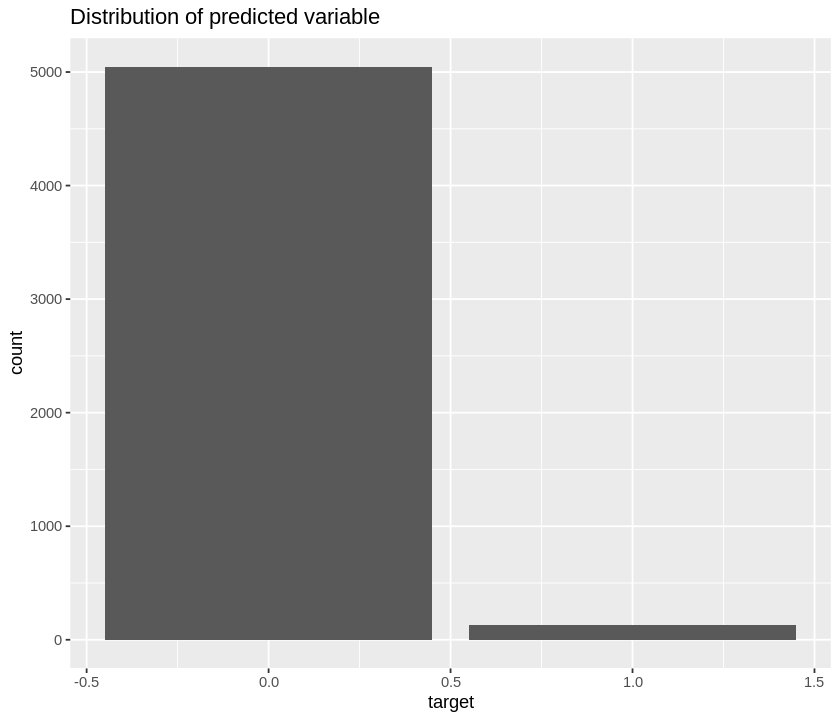

In [26]:
# Make prediction on the test set
test_df_pool = test_df[main_cols] %>% catboost.load_pool()
predictions = catboost.predict(model, test_df_pool, prediction_type = "Class")

# Create a submission file
sub_file = setNames(sample,  names(sample))
sub_file$target = predictions

# Check the distribution of your predictions
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(sub_file, aes(x=target)) +
  geom_bar() +
  labs(title = "Distribution of predicted variable")

In [27]:
# Create a csv file and upload to zindi 
write.csv(sub_file, 'Baseline.csv', row.names=FALSE)

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************